TITANIC SURVIVAL PREDICTION

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

Data Collection & Processing

In [ ]:
# load the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv('/content/tested.csv')

In [ ]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# number of rows and Columns
titanic_data.shape

(418, 12)

In [ ]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Handling the Missing values

In [ ]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [ ]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


In [ ]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

Data Preprocessing

In [ ]:
def dataoverview(titanic, message):
    print(f'{message}:\n')
    num_rows, num_columns = titanic.shape
    print("Number of rows:", num_rows)
    print("\nNumber of columns:", num_columns)
    print("\nColumn names:")
    for column in titanic.columns:
        print(column)
    print("\nMissing values count:", titanic.isna().sum().sum())
    print("\nUnique values count:")
    for column in titanic.columns:
        print(f"{column}: {titanic[column].nunique()}")

In [ ]:
dataoverview(titanic_data, 'Overiew of the training dataset')

Overiew of the training dataset:

Number of rows: 418

Number of columns: 11

Column names:
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Embarked

Missing values count: 1

Unique values count:
PassengerId: 418
Survived: 2
Pclass: 3
Name: 418
Sex: 2
Age: 80
SibSp: 7
Parch: 8
Ticket: 363
Fare: 169
Embarked: 3


Data Analysis

In [ ]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Data Visualization

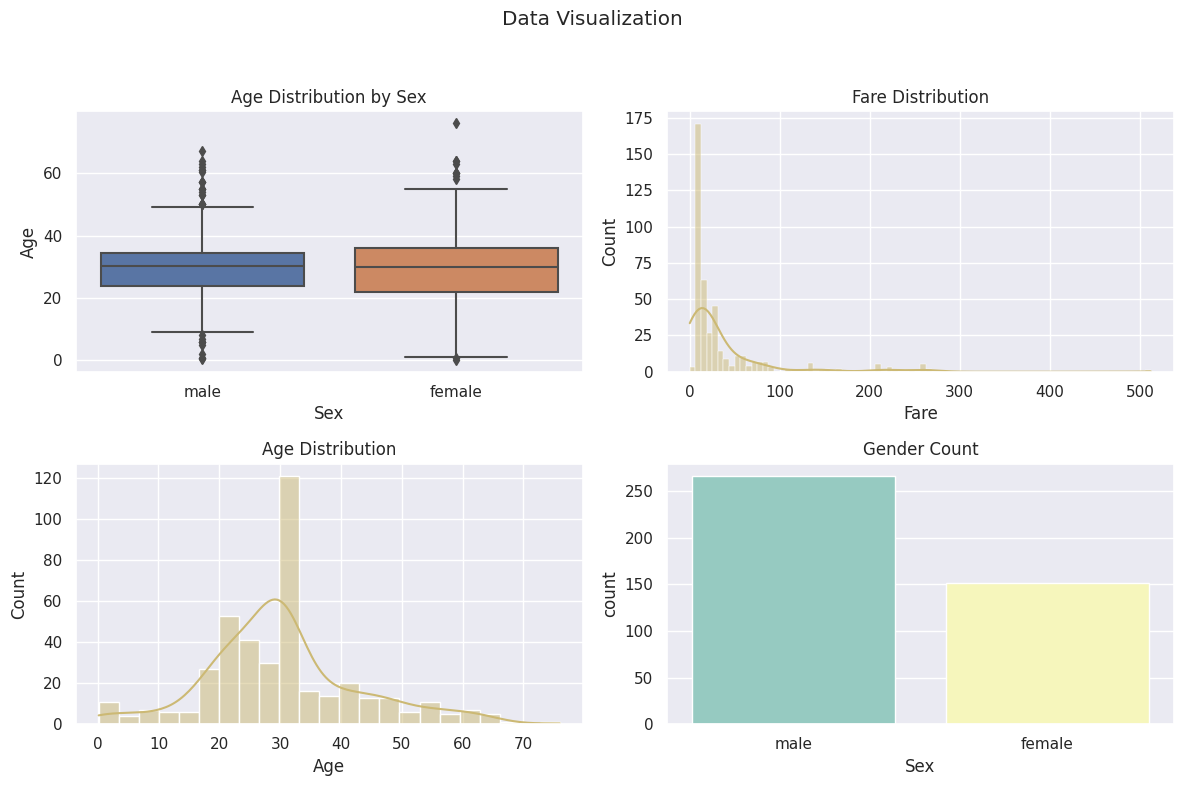

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Data Visualization')

# Plot 1: Boxplot for Age by Sex
sns.boxplot(x='Sex', y='Age', data=titanic_data, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution by Sex')

# Plot 2: Distribution Plot for Fare
sns.histplot(x='Fare', data=titanic_data, color='y', ax=axs[0, 1], kde=True)
axs[0, 1].set_title('Fare Distribution')

# Plot 3: Distribution Plot for Age
sns.histplot(x='Age', data=titanic_data, color='y', ax=axs[1, 0], kde=True)
axs[1, 0].set_title('Age Distribution')

# Plot 4: Count Plot for Sex
sns.countplot(x='Sex', data=titanic_data, ax=axs[1, 1], palette='Set3')
axs[1, 1].set_title('Gender Count')

# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

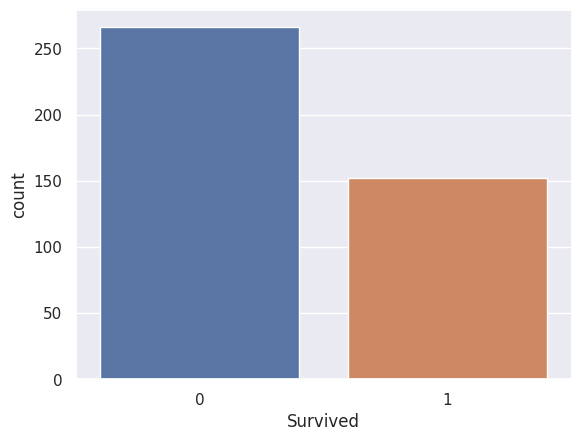

In [ ]:
sns.countplot(x='Survived', data=titanic_data)

In [ ]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

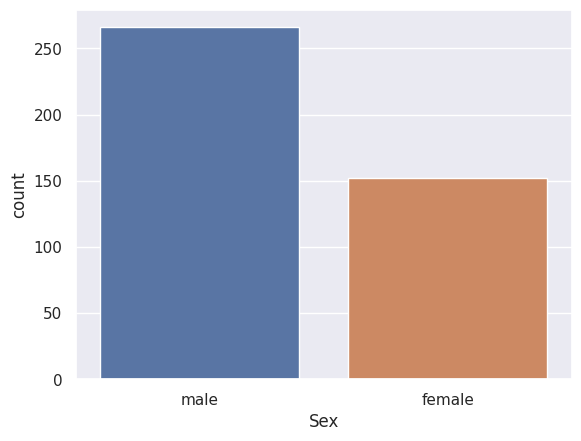

In [ ]:
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

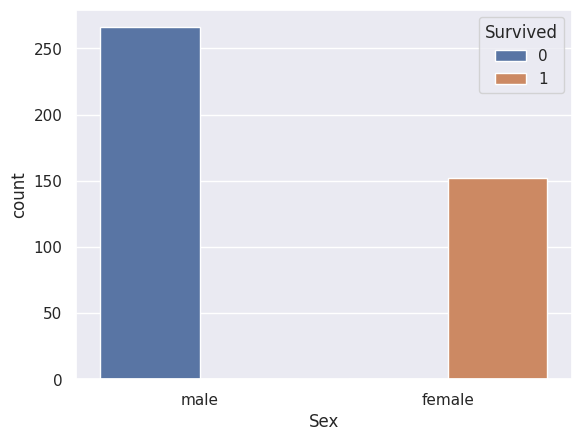

In [ ]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

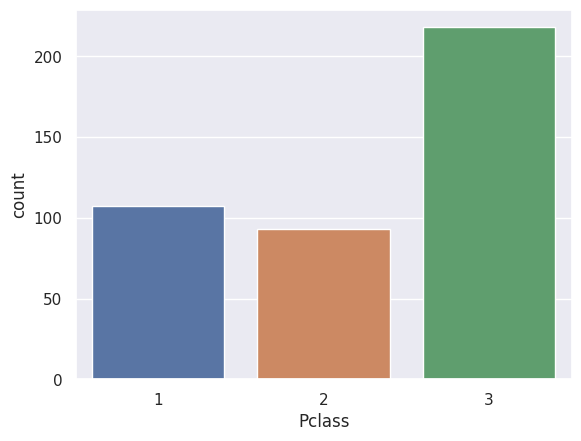

In [ ]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

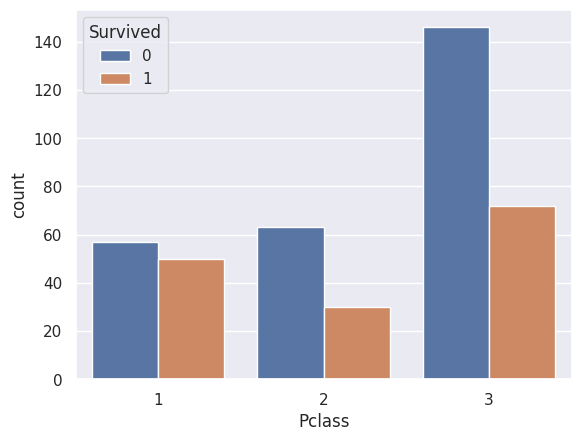

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

In [ ]:
corrmat=titanic_data.corr()

<ipython-input-103-8bd3b743b12a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=titanic_data.corr()


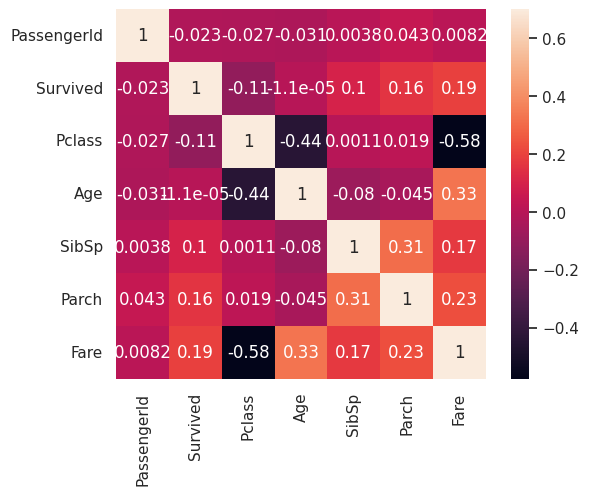

In [ ]:
sns.heatmap(corrmat, vmax=0.7, square=True, annot=True)
plt.show()

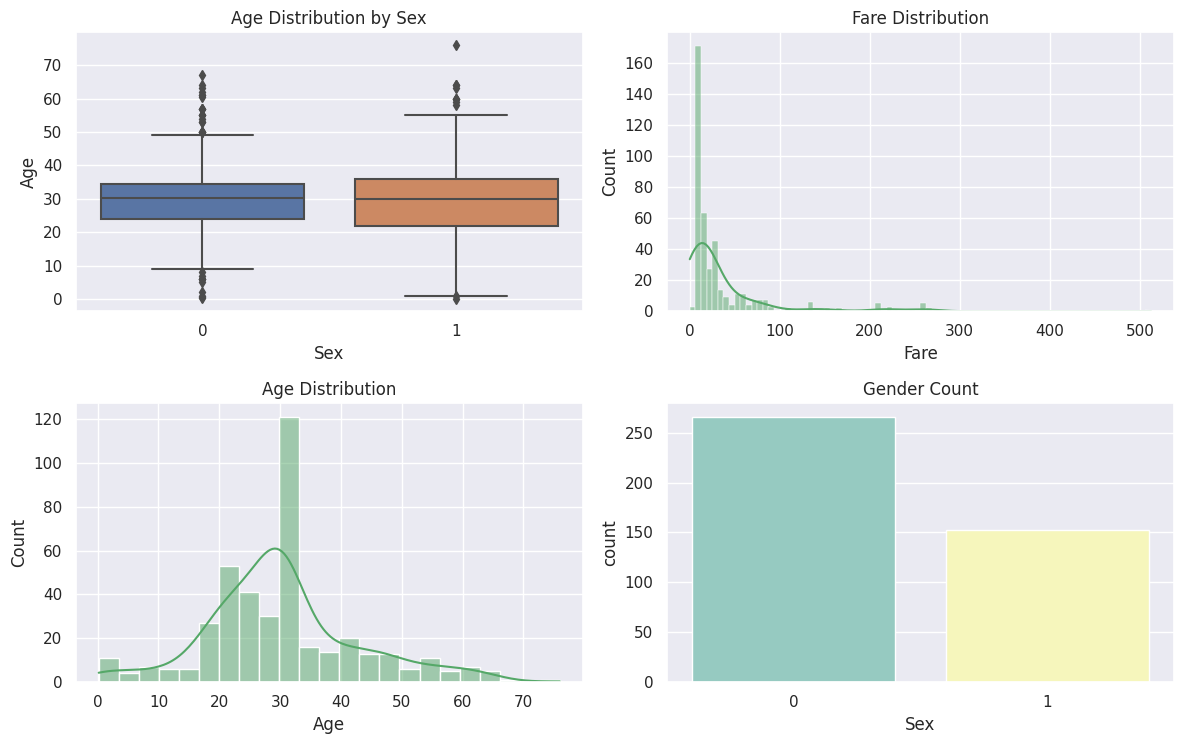

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Define plot parameters
plots = [
    {'data': titanic_data, 'x': 'Sex', 'y': 'Age', 'kind': 'box', 'title': 'Age Distribution by Sex'},
    {'data': titanic_data, 'x': 'Fare', 'kind': 'hist', 'color': 'g', 'kde': True, 'title': 'Fare Distribution'},
    {'data': titanic_data, 'x': 'Age', 'kind': 'hist', 'color': 'g', 'kde': True, 'title': 'Age Distribution'},
    {'data': titanic_data, 'x': 'Sex', 'kind': 'count', 'palette': 'Set3', 'title': 'Gender Count'},
]

# Plot each subplot
for i, plot in enumerate(plots):
    ax = axs[i // 2, i % 2]
    if plot['kind'] == 'box':
        sns.boxplot(x=plot['x'], y=plot['y'], data=plot['data'], ax=ax)
    elif plot['kind'] == 'hist':
        sns.histplot(x=plot['x'], data=plot['data'], color=plot['color'], kde=plot['kde'], ax=ax)
    elif plot['kind'] == 'count':
        sns.countplot(x=plot['x'], data=plot['data'], palette=plot['palette'], ax=ax)
    ax.set_title(plot['title'])

# Adjust subplot spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

Encoding the Categorical Columns

In [ ]:
titanic_data['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [ ]:
titanic_data['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [ ]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


Separating features & Target

In [ ]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [ ]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


Splitting the data into training data & Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with your chosen strategy (e.g., mean or median)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now, you can train your Logistic Regression model on X_train_imputed

In [ ]:
X_train.dropna(axis=0, inplace=True)
Y_train = Y_train[X_train.index]  # Update Y_train to match the remaining rows

In [ ]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1
 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1]


In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [ ]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector

# Define a transformer for numeric features (e.g., age, fare)
numeric_features = selector(dtype_exclude=['object'])(X_train)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Standardize numeric features
])

# Define a transformer for categorical features (e.g., cabin, embarked)
categorical_features = selector(dtype_include=['object'])(X_train)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine the transformers for both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing steps to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import random

# Define a dictionary of machine learning models with custom settings
models = {
    'Logistic Regression': LogisticRegression(max_iter=10, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'Support Vector Machine': SVC(kernel='linear', C=1.0, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(10, 50), max_iter=10, random_state=42)
}

# Specify the maximum number of models to evaluate
max_models_to_evaluate = 3

# Randomly select a subset of models to evaluate
models_to_evaluate = random.sample(models.keys(), max_models_to_evaluate)

# Train and evaluate the selected models
for model_name in models_to_evaluate:
    model = models[model_name]
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred, target_names=['Not Survived', 'Survived'])

    print(f"Model: {model_name}\n")
    print(f"Accuracy: {accuracy * 100:.2f}%\n")
    print("Classification Report:\n")
    print(report)
    print("=" * 10)

Model: Logistic Regression

Accuracy: 70.24%

Classification Report:

              precision    recall  f1-score   support

Not Survived       0.67      1.00      0.80        51
    Survived       1.00      0.24      0.39        33

    accuracy                           0.70        84
   macro avg       0.84      0.62      0.60        84
weighted avg       0.80      0.70      0.64        84

Model: Support Vector Machine

Accuracy: 100.00%

Classification Report:

              precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00        51
    Survived       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Model: Decision Tree

Accuracy: 100.00%

Classification Report:

              precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00        51
    Survived       1.00     

<ipython-input-132-5bed27a8d95b>:25: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  models_to_evaluate = random.sample(models.keys(), max_models_to_evaluate)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
